In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
psf_dir = '/Volumes/Spare Data/Hannah_Data/mattia/rephotometryquestion/'
psf_file = np.genfromtxt(psf_dir + 'HOROLOGIUM_CF.1.TOSEND.CAT')

In [43]:
x, y, m606c, m814c, nstar, sat606, sat814, camera, m606, s606, q606, o606, \
f606, g606, rxs606, sky606, rmssky606, m814, s814, q814, o814, f814, \
g814, rxs814, sky814, rmssky814, ra, dec = 0, 1, 2, 3, 4, 5, 6, 7, 8, \
9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27

In [47]:
psf_g = psf_file[psf_file[:,m814c]>10]

psf_idx = np.argsort(psf_g[:,m814c])[:1000]
psf_1000 = psf_g[psf_idx]

In [3]:
dir = 'catRawMags1305/catDir/'
flc_100 = np.genfromtxt(dir+'flc100source.dat')

In [33]:
flcRoPSF = np.genfromtxt('catRawMags1305/catDir/jdan21l8q_HOROLOGIUM-I_F814W_0206flcRoPSF.dat')

In [87]:
def rot(x0,y0):

    theta = np.deg2rad(95.424057+180)
#     theta = np.deg2rad(180)
    c, s = np.cos(theta), np.sin(theta)

    x = c*x0 - s*y0
    y = s*x0 + c*y0
    
    
    return x, y

In [88]:
roPSF_x, roPSF_y = rot(flcRoPSF[:,0],flcRoPSF[:,1])  

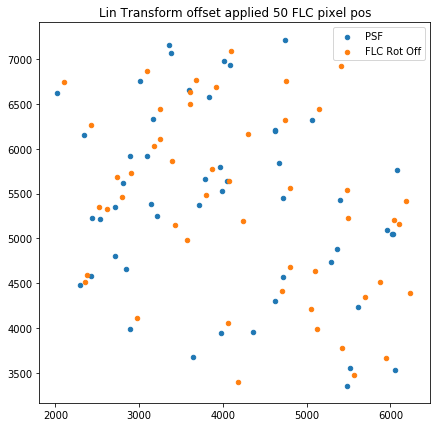

In [97]:
fig, ax = plt.subplots(figsize=(7,7))

colors=['indianred','orange','goldenrod','seagreen','turquoise','rebeccapurple']
# psf_idx = [14,15,16,18,22,25]
# flc_idx = [8,9,10,12,16,18]
# for cc in range(len(colors)):
# #     ax.scatter(psf_1000[:,0][psf_idx[cc]],psf_1000[:,1][psf_idx[cc]],s=100,\
# #             marker='o',facecolor='none',edgecolor=colors[cc])
#     ax.scatter(roPSF_x[flc_idx[cc]]+1899,roPSF_y[flc_idx[cc]]+7065,s=100,\
#             marker='o',color='none',edgecolor=colors[cc])

ax.scatter(psf_100[:,0][:50],psf_100[:,1][:50],label='PSF',s=20)
ax.scatter(roPSF_x[:50]+1899,roPSF_y[:50]+7065,label='FLC Rot Off',s=20)
# ax.scatter(flcRoPSF[:,0][:50],flcRoPSF[:,1][:50],label='FLC Rot Off',s=20)

ax.set_title('Lin Transform offset applied 50 FLC pixel pos')


ax.legend()
plt.show()

In [98]:
drcPSF = np.genfromtxt('catRawMags1305/catDir/jdan21l8q_HOROLOGIUM-I_F814W_0206drcPSF.dat')

In [109]:
drcPSF_1000 = drcPSF[:1000]

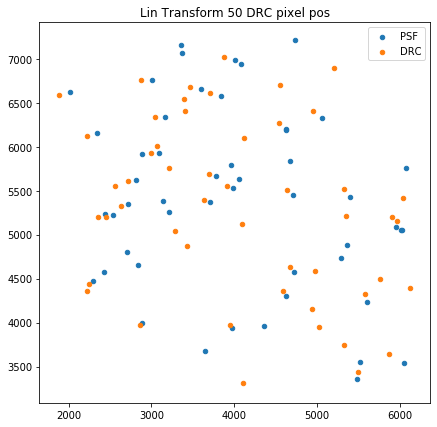

In [101]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(psf_100[:,0][:50],psf_100[:,1][:50],label='PSF',s=20)
# ax.scatter(roPSF_x[:50]+1899,roPSF_y[:50]+7065,label='FLC Rot Off',s=20)
ax.scatter(drcPSF[:,0][:50],drcPSF[:,1][:50],label='DRC',s=20)

ax.set_title('Lin Transform 50 DRC pixel pos')


ax.legend()
plt.show()

In [149]:
master = psf_1000
idxP1000 = np.arange(0,len(master),1)

mas_x = master[:,x]
mas_y = master[:,y]

matchids = np.zeros((len(master),1))

matchtol= 200

nF = True
row = 0

while (nF): # not finished
    matchrows = drcPSF_1000[(abs(mas_x[row] - drcPSF_1000[:,0]) <= \
    matchtol) & (abs(mas_y[row] - drcPSF_1000[:,1]) <= matchtol)]
    
    if (len(matchrows) == 1):
        matchids[row] = idxP1000[row]
        row = row + 1
    else:
        master = np.delete(master, row, 0)
        idxP1000 = np.delete(idxP1000, row, 0)
        matchids = np.delete(matchids,row,0)

    if (row >= len(master)):
        nF = False

In [150]:
len(master)

0

In [130]:
master = psf_1000
idxP1000 = np.arange(0,len(master),1)

mas_x = master[:,x]
mas_y = master[:,y]

In [151]:
match = np.genfromtxt('catRawMags1305/catDir/matched_w_MagsPos2705r2.dat')

In [158]:
ids = np.zeros((len(match),1))
ids[:,0] = np.arange(0,len(match),1)

In [159]:
match = np.hstack((match,ids))

In [163]:
RA, DEC, flux, flags, c_star, mag1, mag2, mag3, mag4, ra1, dec1, \
ra2, dec2, ra3, dec3, ra4, dec4, xr1, yr1, xr2, yr2, xr3, yr3, \
xr4, yr4, xc1, yc1, xc2, yc2, xc3, yc3, xc4, yc4, xt1, yt1, xt2, \
yt2, xt3, yt3, xt4, yt4 = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, \
13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, \
30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40

In [164]:
flc_x = match[:,xt1]
flc_y = match[:,yt1]

In [181]:
psf_ids = np.zeros((len(psf_file),1))
psf_ids[:,0] = np.arange(0,len(psf_file),1)

In [193]:
psf_trackIDs = np.array([2964,1463,2928,3226,2664,3043,2681,2522])
flc_trackIDs = np.array([1447,984,680,421,549,181,109,1])

In [194]:
psf_x = psf_file[:,x]
psf_y = psf_file[:,y]

No handles with labels found to put in legend.


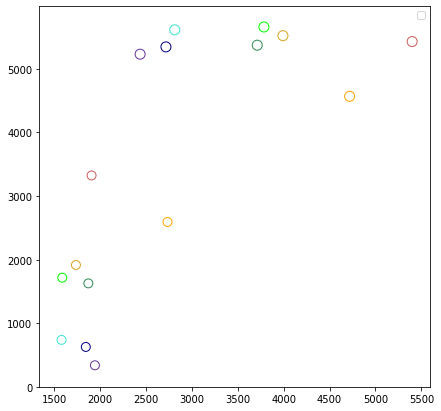

In [195]:
fig, ax = plt.subplots(figsize=(7,7))

colors=['indianred','orange','goldenrod','lime',
        'seagreen','turquoise','navy','rebeccapurple','black']

# for cc in range(len(colors)):
# #     ax.scatter(psf_1000[:,0][psf_idx[cc]],psf_1000[:,1][psf_idx[cc]],s=100,\
# #             marker='o',facecolor='none',edgecolor=colors[cc])
#     ax.scatter(roPSF_x[flc_idx[cc]]+1899,roPSF_y[flc_idx[cc]]+7065,s=100,\
#             marker='o',color='none',edgecolor=colors[cc])
for ii in range(len(psf_trackIDs)):
    ax.scatter(psf_x[psf_trackIDs[ii]],psf_y[psf_trackIDs[ii]],s=100,\
            marker='o',facecolor='none',edgecolor=colors[ii])
    ax.scatter(flc_x[flc_trackIDs[ii]],flc_y[flc_trackIDs[ii]],s=80,\
            marker='o',facecolor='none',edgecolor=colors[ii])


# ax.set_title('Lin Transform offset applied 50 FLC pixel pos')


ax.legend()
plt.show()

In [215]:
rot_fx, rot_fy = rot(flc_x,flc_y)

No handles with labels found to put in legend.


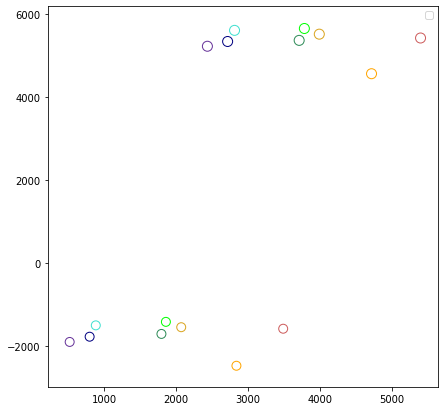

In [197]:
fig, ax = plt.subplots(figsize=(7,7))

colors=['indianred','orange','goldenrod','lime',
        'seagreen','turquoise','navy','rebeccapurple','black']

# for cc in range(len(colors)):
# #     ax.scatter(psf_1000[:,0][psf_idx[cc]],psf_1000[:,1][psf_idx[cc]],s=100,\
# #             marker='o',facecolor='none',edgecolor=colors[cc])
#     ax.scatter(roPSF_x[flc_idx[cc]]+1899,roPSF_y[flc_idx[cc]]+7065,s=100,\
#             marker='o',color='none',edgecolor=colors[cc])
for ii in range(len(psf_trackIDs)):
    ax.scatter(psf_x[psf_trackIDs[ii]],psf_y[psf_trackIDs[ii]],s=100,\
            marker='o',facecolor='none',edgecolor=colors[ii])
    ax.scatter(rot_fx[flc_trackIDs[ii]],rot_fy[flc_trackIDs[ii]],s=80,\
            marker='o',facecolor='none',edgecolor=colors[ii])


# ax.set_title('Lin Transform offset applied 50 FLC pixel pos')


ax.legend()
plt.show()

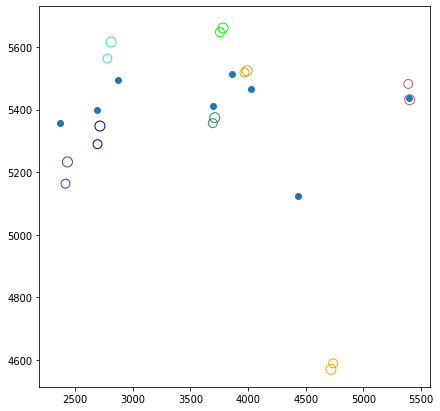

In [199]:
fig, ax = plt.subplots(figsize=(7,7))

colors=['indianred','orange','goldenrod','lime',
        'seagreen','turquoise','navy','rebeccapurple','black']

# for cc in range(len(colors)):
# #     ax.scatter(psf_1000[:,0][psf_idx[cc]],psf_1000[:,1][psf_idx[cc]],s=100,\
# #             marker='o',facecolor='none',edgecolor=colors[cc])
#     ax.scatter(roPSF_x[flc_idx[cc]]+1899,roPSF_y[flc_idx[cc]]+7065,s=100,\
#             marker='o',color='none',edgecolor=colors[cc])
for ii in range(len(psf_trackIDs)):
    ax.scatter(psf_x[psf_trackIDs[ii]],psf_y[psf_trackIDs[ii]],s=100,\
            marker='o',facecolor='none',edgecolor=colors[ii])
    ax.scatter(rot_fx[flc_trackIDs[ii]]+1899,\
               rot_fy[flc_trackIDs[ii]]+7065,s=80,\
            marker='o',facecolor='none',edgecolor=colors[ii])

ax.scatter(flcPSF_r1[:,0][flc_trackIDs],flcPSF_r1[:,1][flc_trackIDs],label='FLC Trans')
# ax.set_title('Lin Transform offset applied 50 FLC pixel pos')


# ax.legend()
plt.show()

In [173]:
diffX = (rot_fx[flc_trackIDs]+1899 - psf_x[psf_trackIDs])
avg_diffX = np.mean(diffX)
print(avg_diffX)

-10.85583201521624


In [175]:
diffY = (rot_fy[flc_trackIDs]+7065 - psf_y[psf_trackIDs])
avg_diffY = np.mean(diffY)
print(avg_diffY)

-14.95193024908834


In [257]:
print(flc_x[flc_trackIDs])
print(flc_y[flc_trackIDs])

[1905.8447 2733.5304 1735.3708 1586.7118 1870.5514 1578.4376 1843.0081
 1942.4414]
[3323.9234 2591.8753 1915.1314 1715.1404 1625.8418  736.2737  625.12
  336.7415]


In [216]:
print(rot_fx[flc_trackIDs])
print(rot_fy[flc_trackIDs])

[3489.19255567 2838.66038074 2070.59434489 1857.44664442 1795.37820268
  882.18082431  796.53370475  518.8455224 ]
[-1583.11278784 -2476.29022154 -1546.57012504 -1417.4811784
 -1708.4909154  -1501.77268973 -1775.66548884 -1901.9129197 ]


In [185]:
for ll in range(len(psf_x[psf_trackIDs])):
    print(psf_x[psf_trackIDs[ll]],psf_y[psf_trackIDs[ll]])

5400.123 5431.417
4718.1953 4569.6943
3991.6089 5523.9956
3783.894 5660.8569
3711.5825 5374.0845
2812.5161 5615.8149
2716.2554 5347.2842
2434.9197 5232.4946


In [186]:
flcPSF_r1 = np.genfromtxt('catRawMags1305/catDir/flc2PSF_round1.dat')

In [191]:
for ll in range(len(flcPSF_r1[flc_trackIDs])):
    print(flcPSF_r1[:,0][flc_trackIDs[ll]],flcPSF_r1[:,1][flc_trackIDs[ll]])

5397.665209 5435.713045
4432.754323 5122.150201
4021.805355 5465.237469
3860.444027 5514.104514
3692.848116 5410.20983
2874.401487 5495.070135
2689.996833 5397.601009
2371.712006 5355.42573


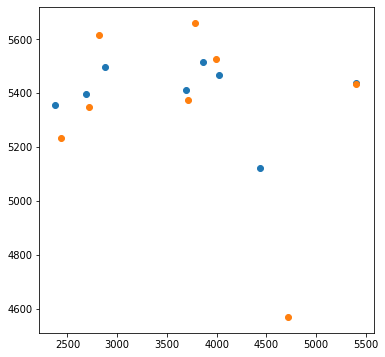

In [214]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(flcPSF_r1[:,0][flc_trackIDs],flcPSF_r1[:,1][flc_trackIDs],label='FLC Trans')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [201]:
flcRPSF_r1 = np.genfromtxt('catRawMags1305/catDir/flcR2PSF_round1.dat')

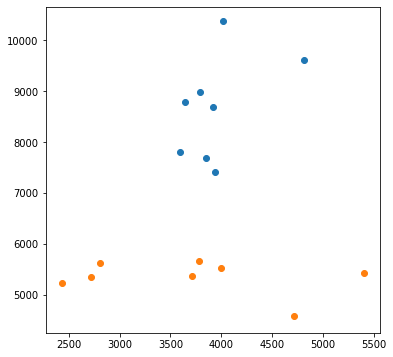

In [210]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(flcRPSF_r1[:,0][flc_trackIDs],flcRPSF_r1[:,1][flc_trackIDs],label='FLC Trans')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [ ]:
rot_xR, rot_xY = rot(flcRPSF_r1[:,0],flcRPSF_r1[:,1])

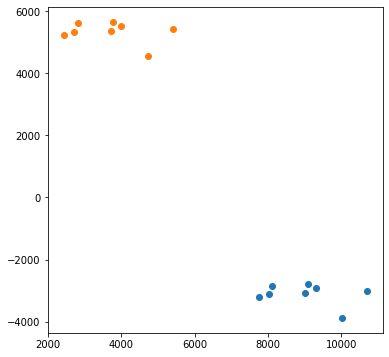

In [213]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(rot_xR[flc_trackIDs],rot_xY[flc_trackIDs],label='FLC Trans')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [244]:
flcRoPSF_r1 = np.genfromtxt('catRawMags1305/catDir/flcRo2PSF_round1.dat') #1899,7065

# Iter      18    CHI-SQUARE =  1.05753464  DOF =  10
#    P0 = -171.0621828
#    P1 = 0.9939024984
#    P2 = 0.0393411571
#    P3 = 198.1022678
#    P4 = -0.03974044916
#    P5 = 0.9937128357

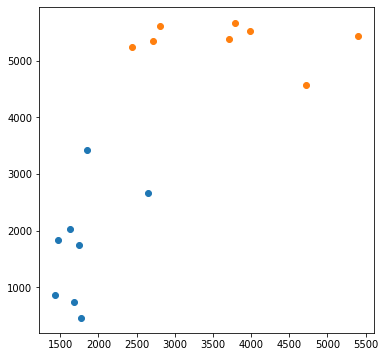

In [245]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(flcRoPSF_r1[:,0][flc_trackIDs],flcRoPSF_r1[:,1][flc_trackIDs],label='FLC Trans Off')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [246]:
rot_xRo, rot_yRo = rot(flcRoPSF_r1[:,0],flcRoPSF_r1[:,1])

In [247]:
xDiff = psf_x[psf_trackIDs] - rot_xRo[flc_trackIDs]
print(np.mean(xDiff))

yDiff = psf_y[psf_trackIDs] - rot_yRo[flc_trackIDs]
print(np.mean(yDiff))

1814.3173852639886
6953.913394438188


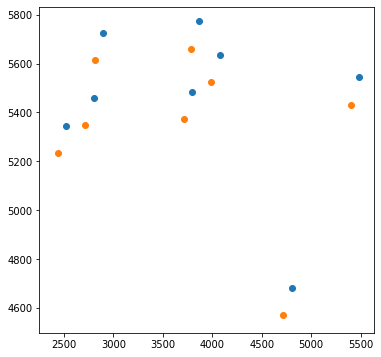

In [250]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(rot_xRo[flc_trackIDs]+1899,rot_yRo[flc_trackIDs]+7065,label='FLC Trans Off')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [227]:
print(rot_xRo[flc_trackIDs])
print(rot_yRo[flc_trackIDs])

[3585.295887   2903.40091105 2177.11897452 1970.44630487 1897.21169842
  997.99915618  902.01482972  621.06805614]
[-1521.83804699 -2383.99475618 -1429.67721631 -1292.980716
 -1579.78328926 -1338.37231302 -1607.23358587 -1721.78523188]


In [219]:
flcRoPSF_r2 = np.genfromtxt('catRawMags1305/catDir/flcRo2PSF_round2.dat') #1899,7065
# flc points given were rotated with an offset added
# Iter      21    CHI-SQUARE =  1.057534673  DOF =  10
#    P0 = -83.36242576
#    P1 = 1.000211582
#    P2 = -0.0003886220597

#    P3 = -108.463945
#    P4 = -0.0003886534739
#    P5 = 0.9997886127

In [220]:
rot_xRo2, rot_yRo2 = rot(flcRoPSF_r2[:,0],flcRoPSF_r2[:,1])

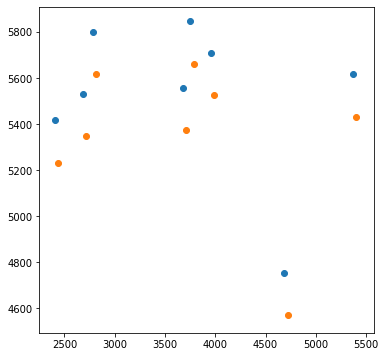

In [226]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(rot_xRo2[flc_trackIDs]+1899,rot_yRo2[flc_trackIDs]+7065,label='FLC Trans Off')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [235]:
flcRoPSF_r2noO = np.genfromtxt('catRawMags1305/catDir/flcRo2PSF_round2noO.dat')
# Iter      26    CHI-SQUARE =  1.057534673  DOF =  10
#    P0 = 1813.29374
#    P1 = 1.000211583
#    P2 = -0.0003886299064
#    P3 = 6954.304555
#    P4 = -0.0003886559991
#    P5 = 0.9997886121

In [236]:
rot_xRo2noO, rot_yRo2noO = rot(flcRoPSF_r2noO[:,0],flcRoPSF_r2noO[:,1])

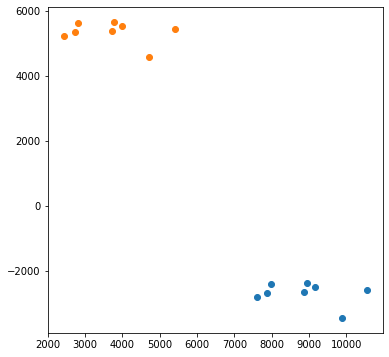

In [242]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(rot_xRo2noO[flc_trackIDs],rot_yRo2noO[flc_trackIDs],label='FLC Trans Off')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [255]:
# DC,OC points to PSF
# Iter      22    CHI-SQUARE =  771518.9458  DOF =  10
#    P0 = 2561.659734
#    P1 = -0.27281871
#    P2 = 1.009636855
#    P3 = 6045.116257
#    P4 = -0.3589608044
#    P5 = 0.02247955964

file = np.genfromtxt('catRawMags1305/catDir/flc2PSF_round1_newMatch.dat')

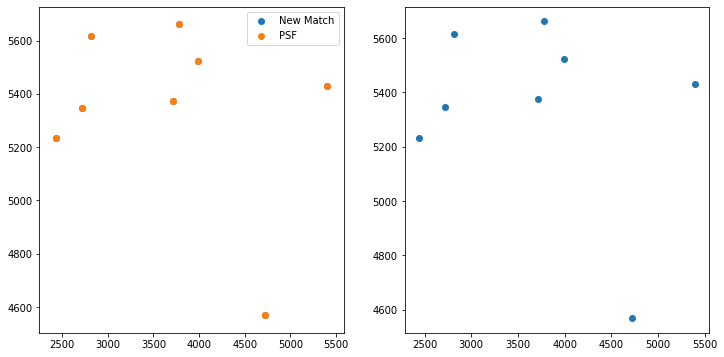

In [256]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))


ax1.scatter(file[:,0],file[:,1],label='New Match')
ax1.scatter(psf_x[psf_trackIDs],psf_y[psf_trackIDs],label='PSF')

ax2.scatter(file[:,0],file[:,1],label='New Match')

ax1.legend()
plt.show()

In [258]:
xDiff = psf_x[psf_trackIDs] - file[:,0]
print(np.mean(xDiff))

yDiff = psf_y[psf_trackIDs] - file[:,1]
print(np.mean(yDiff))

-5.684341886080802e-14
1.1368683772161603e-13


In [259]:
fileN = np.genfromtxt('catRawMags1305/catDir/flc2PSF_round1.dat')

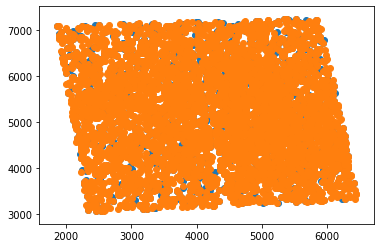

In [261]:
fig , ax = plt.subplots()

ax.scatter(fileN[:,0],fileN[:,1])
ax.scatter(psf_x,psf_y)


plt.show()